# Análise Exploratória - Bitcoin

## Instalar dependências

In [1]:
!pip install pandas
!pip install seaborn
!pip install numpy

# 1. Ler e pré-processar dados

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Dataset Bitcoin

In [3]:
bitcoin_df = pd.read_csv('bitcoin.csv')

Vamos inspecionar algumas caracteristicas dos dados

In [4]:
bitcoin_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


Quantas linhas e colunas temos nos nossos dados?

In [5]:
r,c = bitcoin_df.shape
print(f"Número de linhas: {r}")
print(f"Número de colunas: {c}")

Número de linhas: 4857377
Número de colunas: 8


Devemos também verificar a presença de valores em falta (NaN).
Mais concretamente quantos valores faltam em cada coluna

In [6]:
bitcoin_df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

**Visto que o nossos dados têm mais de 4 milhões de linhas, e contêm informação ao minuto, vamos agrupá-los por dias, utilizando a média diária. Isto irá fornecer uma perspetiva mais macro, associada a um alívio enorme de carga computacional**

In [7]:
# Criar coluna com a data a partir do timestamp
bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Timestamp"], unit="s").dt.date
# Podemos agora apagar o timestamp
bitcoin_df.drop(columns=["Timestamp"], inplace=True)
# Agora agrupamos por dia, utilizando a média
bitcoin_df = bitcoin_df.groupby("Date").mean()
# Converting the index as date
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

Vamos inspecionar agora a estrutura dos nossos dados, assim como o número de `NaN` (valores em falta)

In [8]:
bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [9]:
bitcoin_df.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

Como podemos observar não foi necessário apagar nenhuma linha, utilizando a média diária conseguimos não ter nenhum valor em falta.

**Qual o período de analise que contemos no nosso dataset?**

In [10]:
start_year = min(bitcoin_df.index.date)
end_year = max(bitcoin_df.index.date)

print(f"Periodo de análise: {start_year}<-->{end_year}")

Periodo de análise: 2011-12-31<-->2021-03-31


**Como tem sido a evolução do bitcoin?**

<AxesSubplot:xlabel='Date', ylabel='Weighted_Price'>

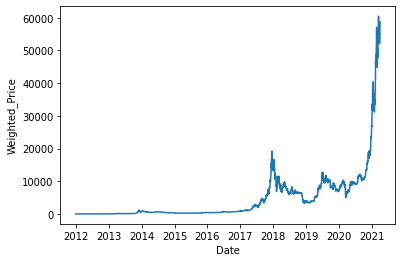

In [11]:
sns.lineplot(data=bitcoin_df, x=bitcoin_df.index, y="Weighted_Price")

Pela análise do gráfico acima concluimos que todas as próximas analises serão feitas a partir de 2016, o ano em que o bitcoin começou a ser relevante.
No fim de 2017 e início de 2018 houve um crescimento exponencial no valor do bitcoin, tendo depois descido bastante. Depois, a meio de 2019 o valor cresceu novamente, até que no fim de 2021 e principalmente inicio de 2021 o valor disparou completamente.

In [12]:
bitcoin_df = bitcoin_df.loc[bitcoin_df.index.year>=2016]

## 1.2 Dataset Tweets do Elon Musk
Este dataset está dividido em vários ficheiros `.csv`, um para cada ano (2010-2021). 
Podemos ler os vários ficheiros e depois concatená-los num só `dataframe`.

In [13]:
tweets_df = pd.read_csv('tweets.csv', index_col='id')

Vamos inspecionar a estrutura geral dos dados

In [14]:
tweets_df.head()

,Unnamed: 0,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
id,,,,,,,,,,,,,,,,,,,,,
15434727182,0,15434727182,1.275676e+12,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
152153637639028736,0,152151847614943233,1.325111e+12,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
151809315026636800,1,151809315026636800,1.325029e+12,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
151338939389706242,2,151338939389706242,1.324917e+12,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
151337237429239808,3,151337237429239808,1.324917e+12,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Agora podemos inspecionar algumas características do nosso dataset

In [15]:
tweets_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43956.0,4.387433e+03,3.480321e+03,0.000000e+00,1.289000e+03,3.463000e+03,7.126000e+03,1.233800e+04
conversation_id,43956.0,8.837439e+17,3.381733e+17,1.659576e+09,6.954503e+17,9.805180e+17,1.152228e+18,1.373669e+18
created_at,43956.0,1.499974e+12,8.050325e+10,1.275676e+12,1.455611e+12,1.523385e+12,1.563781e+12,1.616379e+12
timezone,43956.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
place,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,43956.0,4.419640e+07,0.000000e+00,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07
user_id_str,43956.0,4.419640e+07,0.000000e+00,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07,4.419640e+07
day,43956.0,4.127969e+00,1.963408e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
hour,43956.0,1.241473e+01,7.763416e+00,0.000000e+00,5.000000e+00,1.500000e+01,1.900000e+01,2.300000e+01
video,43956.0,6.570207e-02,2.477634e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Podemos logo ver que existem colunas com valores `NaN`, e parecem exister várias colunas. Vamos ver quantas ao certo, assim como o número de tweets.

In [16]:
r, c = tweets_df.shape

print(f"Número de tweets: {r}")
print(f"Número de features de cada tweet: {c}")

Número de tweets: 43956
Número de features de cada tweet: 38


Vamos apenas manter a coluna `date`, que indica a data, e a coluna `tweet`, que contêm o texto do tweet.
No entanto nem todos os **tweets** são referentes a Bitcoin, vamos filtrar para conter apenas os que têm a palavra "bitcoin" na coluna `tweet` (que contêm o conteúdo do tweet).

In [17]:
# Filtrar colunas
tweets_df=tweets_df.drop(columns = tweets_df.columns.difference(["tweet", "date"]))
tweets_df['date']= pd.to_datetime(tweets_df['date'])
# Fazer da coluna `created_at` o index
tweets_df = tweets_df.set_index("date")
# # Filtrar tweets para apenas os que contenham "bitcoin", "cryptocurrency" ou "crypto"
tweets_df = tweets_df[tweets_df['tweet'].str.lower().str.contains('bitcoin')]
# Dropar duplicatos
tweets_df.drop_duplicates(inplace=True)

Quantos tweets temos agora?

In [18]:
tweets_df.shape[0]

13

Surpreendemente o número de tweets referentes à temática do Bitcoin é **bastante baixo**. Seria de esperar um maior volume, pois o Elon Musk é muitas vezes atribuído como o "culpado" das oscilações bruscas de preço.

In [19]:
tweets_df

,tweet
date,
2018-10-22 23:51:15,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...
2020-12-20 09:24:37,Bitcoin is almost as bs as fiat money
2020-12-20 08:21:25,Bitcoin is my safe word
2020-11-16 22:02:51,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶
2020-05-15 22:51:44,@jk_rowling I still only own 0.25 Bitcoins btw
2020-05-15 22:03:01,"@jk_rowling Pretty much, although massive curr..."
2020-05-01 22:44:56,@Bitcoin How much for some anime Bitcoin? htt...
2020-05-01 22:34:24,@Bitcoin 🤣🤣
2020-01-10 06:58:23,@bitcoin2020conf 😉


**Vamos agora analisar a correlação entre os tweets e o preço do Bitcoin**

Primeiro criamos um método para reutilizar a lógica de código para visualizar a influência de um acontecimento no preço do Bitcoin

In [20]:
from datetime import timedelta

def show_correlation_in_detail(data, color, text_attribute, days_to_analyze=30):
    # Criar o delta temporal
    one_day_delta = timedelta(days=1)
    
    # Vamos iterar pelo objeto a analisar
    for index,obj in data.iterrows():
        # Criar lista com k dias antes
        before = [index.date() - k*one_day_delta for k in range(days_to_analyze+1)]
        # Criar lista com k dias depois
        after = [index.date() + k*one_day_delta for k in range(1,days_to_analyze+1)]
        # Juntar listas (e ordenar)
        timespan = sorted(before  + after)

        # Filtrar dataset bitcoin para estas datas
        filtered_bitcoin_df = bitcoin_df[bitcoin_df.index.isin(timespan)]

        # Criar nova figura
        plt.figure()
        # Fazer plot do valor bitcoin
        ax = sns.lineplot(data=filtered_bitcoin_df, y='Weighted_Price', x=filtered_bitcoin_df.index)
        # Rodar labels do x
        plt.xticks(rotation=45)
        # Fazer plot da linha vertical que marca a data do objeto a analisar
        ax.axvline(index.date(), ls='--', c=color)
        # Fazer plot do texto
        text = getattr(obj, text_attribute)
        plt.text(index.date(), ax.get_ylim()[1]-4, text,
             horizontalalignment='center',
             verticalalignment='center',
             color=color,
             bbox=dict(facecolor='white', alpha=0.9))



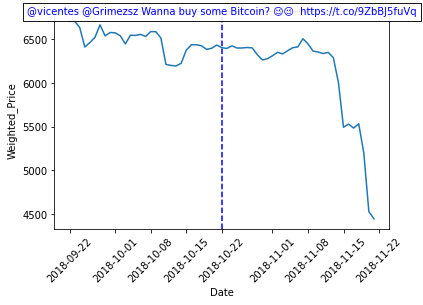

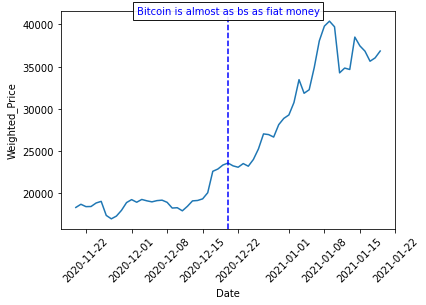

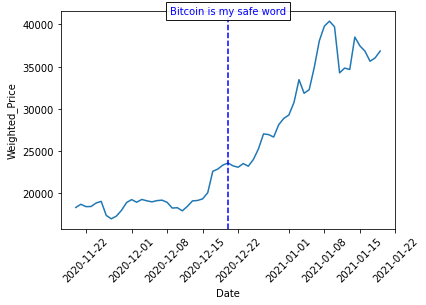

e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127926 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127926 missing from current font.
  font.set_text(s, 0, flags=flags)


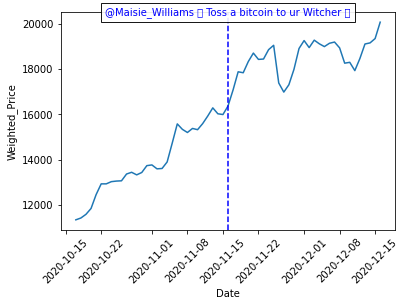

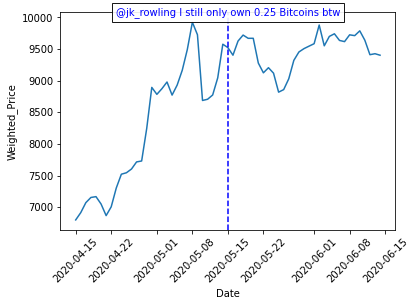

e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128123 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128123 missing from current font.
  font.set_text(s, 0, flags=flags)


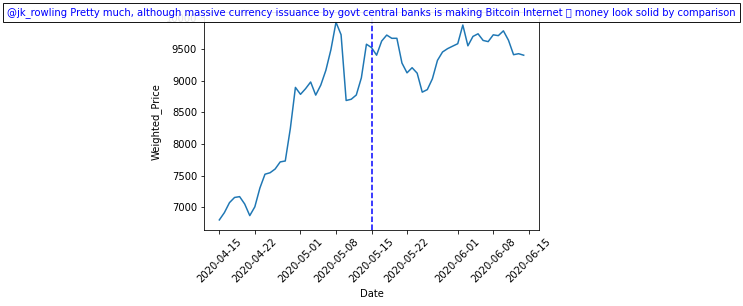

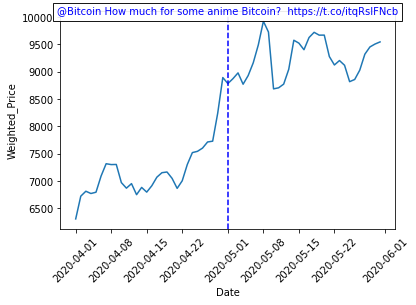

e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\programs\python\python394\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


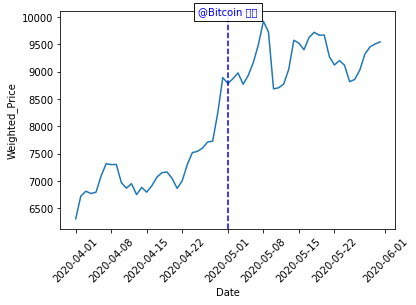

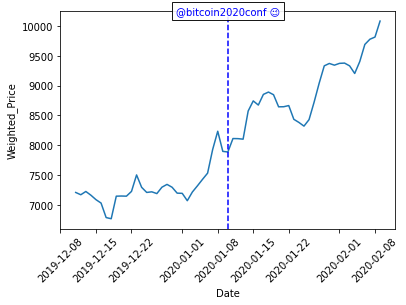

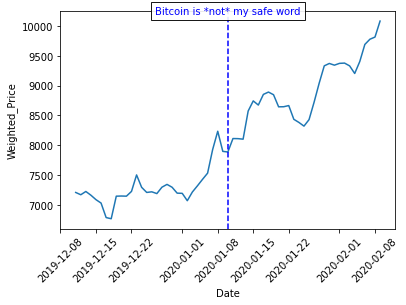

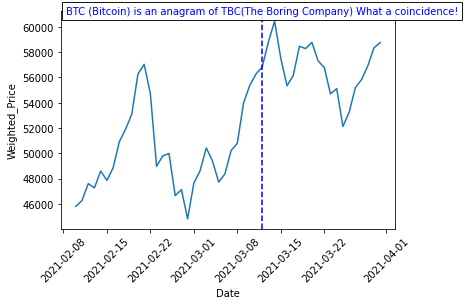

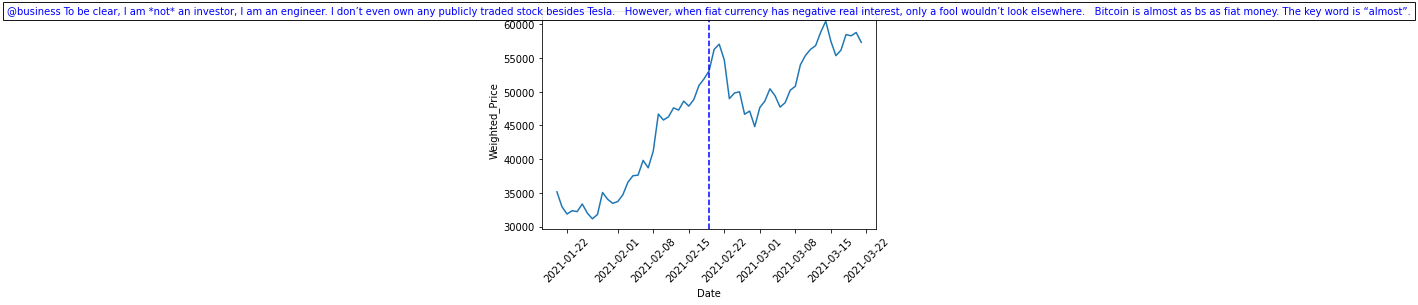

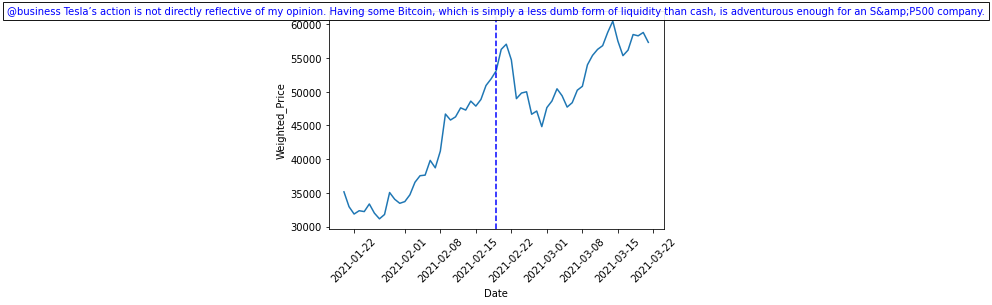

In [21]:
show_correlation_in_detail(tweets_df, color='blue', text_attribute='tweet')

Através da análise dos gráficos anteriores podemos concluir que de facto o preço do Bitcoin começou a ser inflacionado devido a Tweets do Elon Musk a partir de 2021. Isto foi quando o Bitcoin começou a atingir os seus maiores picos de sempre, o novo *bull-run*. É um facto que muitas pessoas começaram a aderir ao Bitcoin devido a ser bastante falado, e ser "trendy". O facto de haver um fluxo enorme de pessoas inexperientes a investir, levou a que o preço fosse mais facilmente influenciável por figuras públicas, como o Elon Musk.

**Quais serão as palavras mais frequentes nos tweets sobre Bitcoin e criptomoedas?**

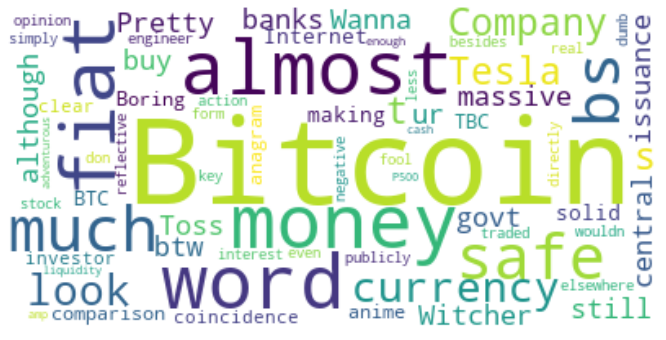

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Gerar nuvem de palavras
words=''
for text in tweets_df['tweet']:
    # Remover todas as palavras começadas por "@" (menções), e as "palavras" que contêm "http" (são links)
    text = ' '.join(filter(lambda x:x[0]!='@' and 'http' not in x, text.split()))
    # Adicionar as palavras
    words+= ' ' + text
    
wordcloud = WordCloud( background_color='white', max_words=1500).generate(words)
# Fazer plot
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Dataset das notícias do The New York Times

In [52]:
# Ler o dataset
news_df = pd.read_csv('news.csv')

Vamos inspecionar a estrutura geral dos dados

In [53]:
news_df.head()

,timestamp,title,score
0,1.618500e+09,Bitcoin Is Normal Now. Yay?,0.5267
1,1.619330e+09,We�re All Crypto People Now,0.0000
2,1.619521e+09,Tesla Makes Money (Including From Selling Cars),0.0000
3,1.616498e+09,Miami Wants to Be the Hub for Bitcoin,0.0000
4,1.618657e+09,Crypto Is Minting Lobbyists,0.0000


Em primeiro lugar, podemos ver que nem todas as notícias apresentam a palavra "Bitcoin" no titulo (são etiquetadas com Bitcoin). Vamos primeiro filtrar para apenas conter notícias que contenham "Bitcoin", "Cripto" ou "Criptocurrency" (tal como fizemos nos tweets).

In [54]:
# Filtrar noticias para apenas os que contenham "bitcoin", "criptocurrency" ou "cripto"
news_df = news_df[news_df['title'].str.lower().str.contains('bitcoin|criptocurrency|cripto')]

Como podemos observar este dataset não apresenta um elevado número de *features*, havendo apenas um `timestamp` (que deverá ser convertido para data), um `title` (título da notícia), e um `score`. Este `score` indica a positividade/negatividade presente no título da notícia (**sentiment analysis**), e foi previamente calculado usando a biblioteca de processamento de linguagem natural `nltk`.

In [55]:
# Em primeiro vamos converter o timestamp para uma data
news_df["Date"] = pd.to_datetime(news_df["timestamp"], unit="s")
# Agora podemos apagar a coluna 'timestamp'
news_df.drop(columns=["timestamp"], inplace=True)
# E colocamos a coluna "Date" como index
news_df = news_df.set_index("Date")

In [56]:
news_df

,title,score
Date,,
2021-04-15 15:17:21,Bitcoin Is Normal Now. Yay?,0.5267
2021-03-23 11:21:35,Miami Wants to Be the Hub for Bitcoin,0.0000
2021-03-24 12:15:24,"Tesla will accept Bitcoin as payment, Elon Mus...",0.3818
2021-03-09 11:47:50,Bitcoin�s Climate Problem,-0.4019
2021-03-09 13:08:01,Why Bill Gates Is Worried About Bitcoin,-0.2960
...,...,...
2020-08-13 16:04:04,U.S. Seizes Bitcoin Said to Be Used to Finance...,-0.6908
2018-12-27 10:00:05,Remember Bitcoin? Some Investors Might Want to...,-0.1531
2020-07-15 20:35:47,A Brazen Online Attack Targets V.I.P. Twitter ...,-0.7783


Agora é também importante filtrar as notícias, para conter apenas noticias que estejam no mesmo periodo de analise que o dataset do bitcoin

In [57]:
news_df= news_df[news_df.index.date < max(bitcoin_df.index.date)]

Quantas notícias temos?

In [58]:
news_df.shape[0]

355

Verifiquemos a existência de valores em falta (`NaN`)

In [59]:
news_df.isna().sum()

title    0
score    0
dtype: int64

Como podemos observar neste dataset não existe nenhum valor em falta.
**Num próximo passo podemos explorar como será a distribuição da análise de sentimento do título da notícia. Será que segue uma distribuição normal?**

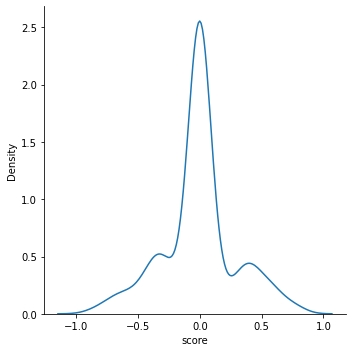

In [60]:
import seaborn as sns
sns.displot(news_df, x="score", kind="kde")

Como podemos observar a análise de sentimento segue uma distribuição **aproximadamente** normal. 

**Vamos dividir as notícias em 3 categorias: negativas, neutras, positivas. Quantas haverá ao certo de cada?**


<AxesSubplot:ylabel='count'>

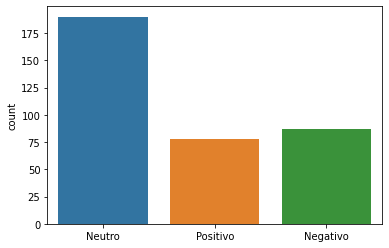

In [61]:
conditions = [
    news_df["score"] < 0,
    news_df["score"] == 0,
    news_df["score"] > 0,
]

values = ['Negativo', 'Neutro', 'Positivo']

score_categories = np.select(conditions, values)
sns.countplot(x=score_categories)

Sendo que a maioria das notícias são **neutras** (score de 0). Algo que é expectável da escrita jornalistica (de um jornal conceituado).

**Como terá sido a evolução do número de notícias, relacionadas com Bitcoin, ao longo dos anos? Iremos considerar apenas a partir de 2016, que foi quando o bitcoin realmente começou a ter impacto. Já nas notícias vamos considerar as 5 mais negativas, e as 5 mais positivas para verificar qual o seu impacto no preço.**

Primeiro vamos só verificar o top5 de notícias positivas e o top5 de notícias negativas

In [62]:
def print_top_k(title, topk):
    """
    Método que faz o print dos elementos de um dataframe
    """
    print(title)
    topk=[(row["score"], row["title"]) for _, row in topk.iterrows() ]
    for idx, el in enumerate(topk):
        print(f"#{idx+1}- Score: {el[0]} | Title: '{el[1]}'")

In [63]:

top_positive=news_df.loc[news_df.index.year>=2016].nlargest(5,'score')
top_negative=news_df.loc[news_df.index.year>=2016].nsmallest(5, 'score')

print_top_k("Top 5 Notícias Positivas:", top_positive)
print("\n")
print_top_k("Top 5 Notícias Negativas:", top_negative)

Top 5 Notícias Positivas:
#1- Score: 0.7783 | Title: 'Jerusalem, Bitcoin, Nobel Peace Prize: Your Monday Briefing'
#2- Score: 0.6486 | Title: 'Bitcoin Hasn�t Replaced Cash, but Investors Don�t Care'
#3- Score: 0.6486 | Title: 'Rise of Bitcoin Competitor Ripple Creates Wealth to Rival Zuckerberg'
#4- Score: 0.5719 | Title: 'Mike and Nathaniel�s Week in Tech: Everybody Loves Bitcoin'
#5- Score: 0.5267 | Title: 'One of Bitcoin�s Biggest Champions Turns Bearish: DealBook Briefing'


Top 5 Notícias Negativas:
#1- Score: -0.875 | Title: 'Bitcoin Thieves Threaten Real Violence for Virtual Currencies'
#2- Score: -0.7783 | Title: 'A Brazen Online Attack Targets V.I.P. Twitter Users in a Bitcoin Scam'
#3- Score: -0.7096 | Title: 'Is Bitcoin a Waste of Electricity, or Something Worse?'
#4- Score: -0.6908 | Title: 'U.S. Seizes Bitcoin Said to Be Used to Finance Terrorist Groups'
#5- Score: -0.6808 | Title: 'As Bitcoin Bubble Loses Air, Frauds and Flaws Rise to Surface'


**Agora podemos fazer um plot que correlacione a evolução do preço com a publicação das notícias.**

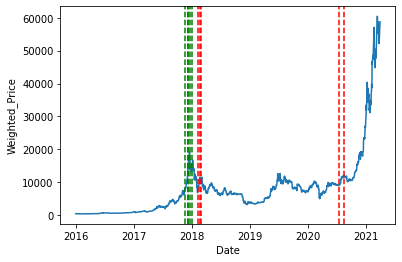

In [66]:
# Primeiros fazemos o plot da evolução diária do bitcoin
ax = sns.lineplot(data=bitcoin_df, y='Weighted_Price', x=bitcoin_df.index)

for p,n in zip(top_positive.index, top_negative.index):
    ax.axvline(p, ls='--', c='green')
    ax.axvline(n, ls='--', c='red')


**Vamos analisar com mais detalhe a variação de preço em cada uma das notícias. Veremos o preço 30 dias antes e 30 dias depois.**

**Vamos então analisar o comportamento do Bitcoin após a publicação das notícias mais positivas**

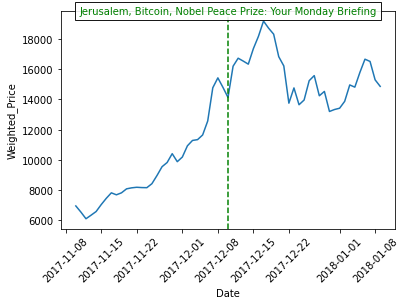

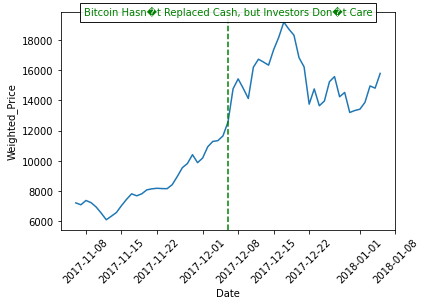

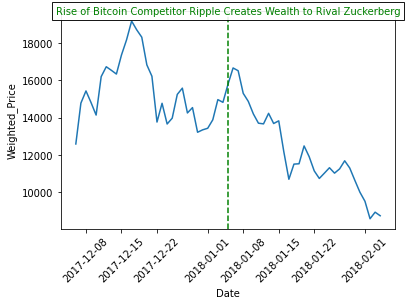

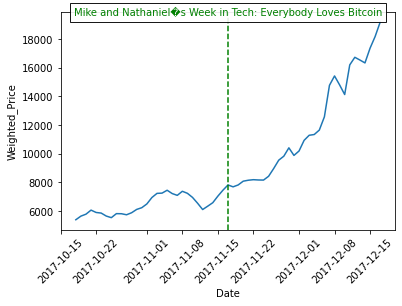

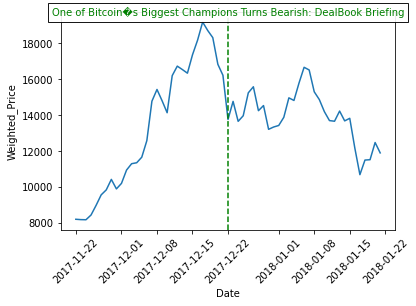

In [67]:
show_correlation_in_detail(top_positive, color='green', text_attribute='title')

Destas 5 notícias, 3 parecem ter provocado uma subida no preço do Bitcoin (primeira, segunda, quinta figura). Uma delas foi publicada a meio de uma subida do valor (terceira figura), e outra parece não ter tido qualquer feito no valor (quarta figura).

**E agora podemos fazer o mesmo para as notícias mais negativas**

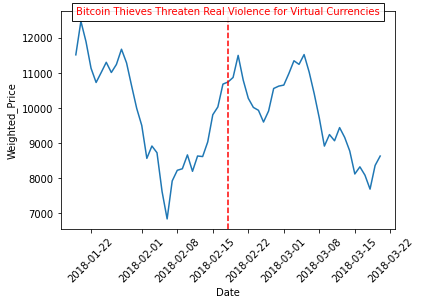

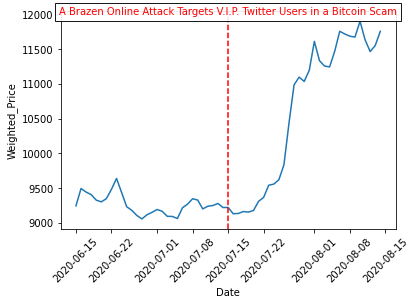

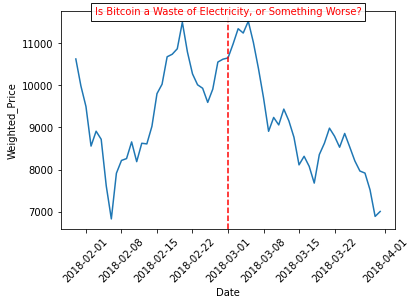

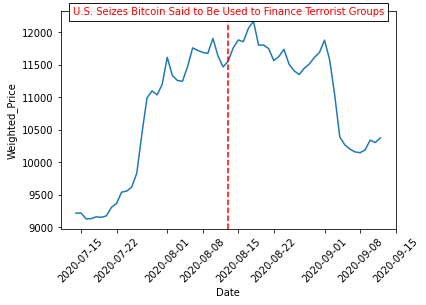

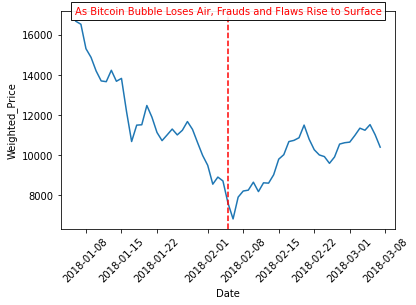

In [68]:
# Agora vamos então analisar em detalhe as noticias mais negativas
show_correlation_in_detail(top_negative, color='red', text_attribute='title')

Ao analisarmos estas 5 notícias, podemos concluir que apesar das notícias parecerem bastante desencorajadoras do investimento em Bitcoin, o preço do mesmo continuou a subir. Isto indica que mesmo a "má publicidade" que possa existir não parece afastar investidores.

**Quais as principais palavras presentes nos títulos destas notícias?**

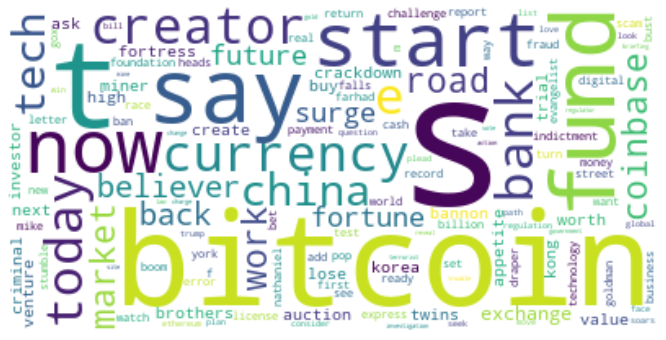

In [69]:
# Gerar nuvem de palavras
words = ' '.join(news_df['title'])
# Eliminar palavras repetidas
words=' '.join(list(set(words.lower().split())))
wordcloud = WordCloud( background_color='white', max_words=1500).generate(words)
# Fazer plot
# Plot
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Previsão do valor do Bitcoin
A análise exploratória efetuado permite verificar a volatilidade do Bitcoin, sendo que o seu preço é facilmente afetuado por fatores externos, à partida impossíveis de prever.
No entanto, vamos verificar o quão exequivel é tentar o valor da moeda.